***Libraries***



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/fitness_dataset.csv')

In [ ]:
df.head(10)

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1
5,25,172,85,81.2,119.2,7.7,7.35,4.08,yes,M,0
6,78,193,83,79.6,132.5,7.4,2.16,3.42,yes,F,0
7,38,188,57,81.2,110.6,6.6,8.47,4.96,0,M,1
8,56,164,108,70.1,140.9,9.1,4.15,2.06,no,F,0
9,75,198,55,67.1,129.5,8.1,0.36,1.25,0,F,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2000.0,49.114000,17.926564,18.0,34.0000,49.000,65.000,79.00
height_cm,2000.0,174.533000,14.371750,150.0,162.0000,174.000,187.000,199.00
weight_kg,2000.0,83.540500,25.852534,30.0,64.0000,83.000,102.000,250.00
heart_rate,2000.0,70.288600,11.846339,45.0,62.1000,70.250,78.425,118.60
blood_pressure,2000.0,119.908850,14.578032,90.0,109.7000,120.000,129.800,171.20
sleep_hours,1840.0,7.513315,1.502031,4.0,6.5000,7.500,8.600,12.00
nutrition_quality,2000.0,5.035140,2.864156,0.0,2.5475,5.065,7.470,10.00
activity_index,2000.0,2.999040,1.136383,1.0,2.0375,2.980,3.950,4.99
is_fit,2000.0,0.399500,0.489918,0.0,0.0000,0.000,1.000,1.00


# Feature Engineering

In [ ]:
df['BMI']=df['weight_kg']/(df['height_cm']**2)

## ***`Handling Missing`***

In [ ]:
df.isnull().sum()

,0
age,0
height_cm,0
weight_kg,0
heart_rate,0
blood_pressure,0
sleep_hours,160
nutrition_quality,0
activity_index,0
smokes,0
gender,0


In [ ]:
df['sleep_hours'] = df['sleep_hours'].fillna(df['sleep_hours'].mean())

In [ ]:
df['sleep_hours'].value_counts()

,count
sleep_hours,
7.513315,160
7.400000,55
7.900000,52
7.600000,51
7.700000,50
...,...
12.000000,2
11.200000,2
4.200000,1


In [ ]:
df.isnull().sum()

,0
age,0
height_cm,0
weight_kg,0
heart_rate,0
blood_pressure,0
sleep_hours,0
nutrition_quality,0
activity_index,0
smokes,0
gender,0


In [ ]:
df['sleep_hours'].mean()

np.float64(7.513315217391304)

In [ ]:
df.head(100)

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit,BMI
0,56,152,65,69.6,117.0,7.513315,2.37,3.97,no,F,1,0.002813
1,69,186,95,60.8,114.8,7.500000,8.77,3.19,0,F,1,0.002746
2,46,192,103,61.4,116.4,7.513315,8.20,2.03,0,F,0,0.002794
3,32,189,83,60.2,130.1,7.000000,6.18,3.68,0,M,1,0.002324
4,60,175,99,58.1,115.8,8.000000,9.95,4.83,yes,F,1,0.003233
...,...,...,...,...,...,...,...,...,...,...,...,...
95,46,154,119,45.0,110.8,6.600000,3.52,1.39,1,F,0,0.005018
96,35,154,92,75.6,127.4,8.800000,4.29,4.97,yes,F,1,0.003879
97,43,196,76,85.8,124.5,7.513315,8.24,2.60,no,M,1,0.001978
98,61,172,101,49.1,142.0,5.600000,7.66,1.65,yes,F,0,0.003414


In [ ]:
df['smokes'] = df['smokes'].replace({'yes': 1, 'no': 0})

In [ ]:
df['smokes'] = df['smokes'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        2000 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   int64  
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
 11  BMI                2000 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 187.6+ KB


## **`Data Visualization`**

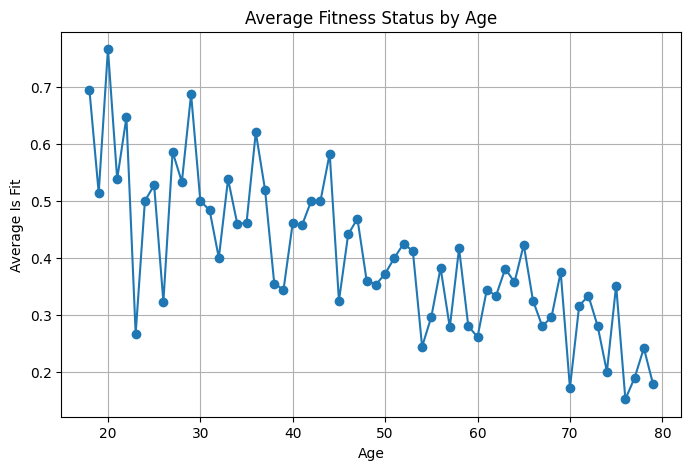

In [ ]:
age_fit = df.groupby('age')['is_fit'].mean()

plt.figure(figsize=(8,5))
plt.plot(age_fit.index, age_fit.values, marker='o')
plt.title("Average Fitness Status by Age")
plt.xlabel("Age")
plt.ylabel("Average Is Fit")
plt.grid(True)
plt.show()

A normal person who sleeps between 7-8 hours has normal blood pressure, as we can see.





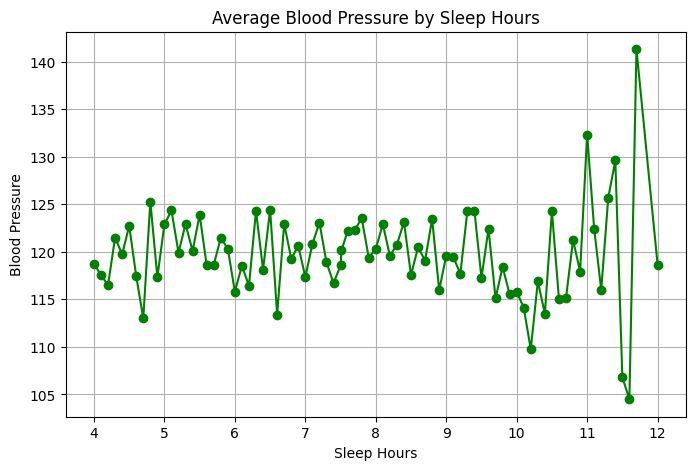

In [ ]:
sleep_bp = df.groupby('sleep_hours')['blood_pressure'].mean()
plt.figure(figsize=(8,5))
plt.plot(sleep_bp.index, sleep_bp.values, marker='o', color='green')
plt.title("Average Blood Pressure by Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Blood Pressure")
plt.grid(True)
print('A normal person who sleeps between 7-8 hours has normal blood pressure, as we can see.\n\n\n')
plt.show()

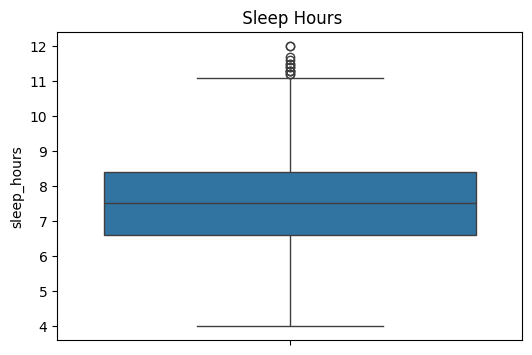

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['sleep_hours'])
plt.title(" Sleep Hours")
plt.show()

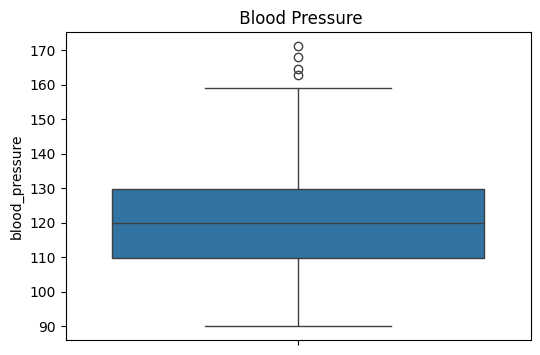

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['blood_pressure'])
plt.title(" Blood Pressure")
plt.show()

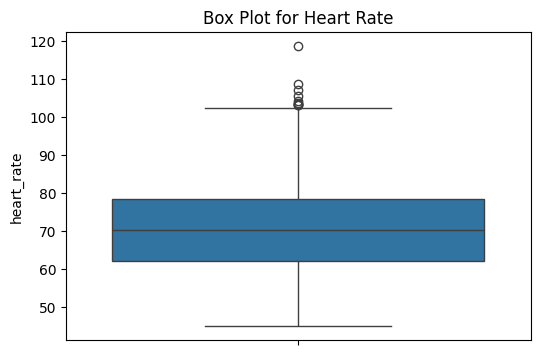

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['heart_rate'])
plt.title("Box Plot for Heart Rate")
plt.show()

In [ ]:
df['gender'].head(10)

,gender
0,F
1,F
2,F
3,M
4,F
5,M
6,F
7,M
8,F
9,F


In [ ]:
df["gender"] = df["gender"].map({"M": 1, "F": 0}).astype(int)

df['gender'].head(10)

In [ ]:
df['smokes'].head(10)

,smokes
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,0
8,0
9,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        2000 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   int64  
 9   gender             2000 non-null   int64  
 10  is_fit             2000 non-null   int64  
 11  BMI                2000 non-null   float64
dtypes: float64(6), int64(6)
memory usage: 187.6 KB


## ***`handling outliers`***

In [ ]:
Q1 = df["heart_rate"].quantile(0.25)
Q3 = df["heart_rate"].quantile(0.75)
IQR = Q3 - Q1
lower_hr = Q1 - 1.5 * IQR
upper_hr = Q3 + 1.5 * IQR
df = df[(df["heart_rate"] >= lower_hr) & (df["heart_rate"] <= upper_hr)]


In [ ]:
Q1 = df["blood_pressure"].quantile(0.25)
Q3 = df["blood_pressure"].quantile(0.75)
IQR = Q3 - Q1
lower_bp = Q1 - 1.5 * IQR
upper_bp = Q3 + 1.5 * IQR

df = df[(df["blood_pressure"] >= lower_bp) & (df["blood_pressure"] <= upper_bp)]

# ***`[#BOX blot after handling outliers]`***



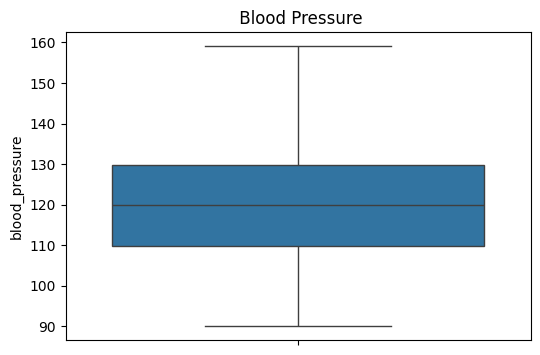

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['blood_pressure'])
plt.title(" Blood Pressure")
plt.show()

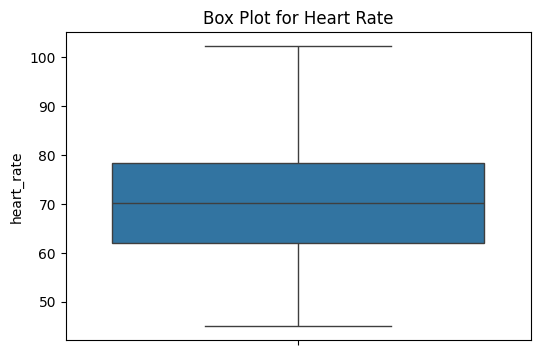

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['heart_rate'])
plt.title("Box Plot for Heart Rate")
plt.show()

## ***`Scaling`***

In [ ]:
scaler = StandardScaler()
num_cols = ["age", "height_cm", "weight_kg", "sleep_hours", "heart_rate", "blood_pressure",'nutrition_quality'	,'activity_index','BMI']

df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
df.head(10)

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit,BMI
0,0.381713,-1.569672,-0.716813,-0.044702,-0.196717,-0.000026,-0.933638,0.853445,0,0,1,0.015153
1,1.107739,0.798514,0.442400,-0.803415,-0.349012,-0.009273,1.305124,0.167554,0,0,1,-0.052086
2,-0.176768,1.216429,0.751523,-0.751684,-0.238252,-0.000026,1.105734,-0.852489,0,0,0,-0.004118
3,-0.958642,1.007472,-0.021285,-0.855145,0.710133,-0.356510,0.399125,0.598435,0,1,1,-0.473593
4,0.605106,0.032336,0.596962,-1.036202,-0.279787,0.337965,1.717895,1.609685,1,0,1,0.433535
5,-1.349579,-0.176621,0.055996,0.955420,-0.044421,0.129622,0.808398,0.950174,1,1,0,0.074833
6,1.610372,1.286082,-0.021285,0.817472,0.876274,-0.078720,-1.007098,0.369804,1,0,0,-0.568703
7,-0.623553,0.937819,-1.025937,0.955420,-0.639758,-0.634300,1.200182,1.724000,0,1,1,-1.182902
8,0.381713,-0.733842,0.944726,-0.001593,1.457765,1.101886,-0.310983,-0.826109,0,0,0,1.214660
9,1.442828,1.634345,-1.103218,-0.260245,0.668598,0.407412,-1.636749,-1.538380,0,0,0,-1.392252


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("is_fit", axis=1)
y = df["is_fit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

In [ ]:
results = {}

Training Logistic Regression...
Logistic Regression Accuracy: 0.8040

Confusion Matrix:


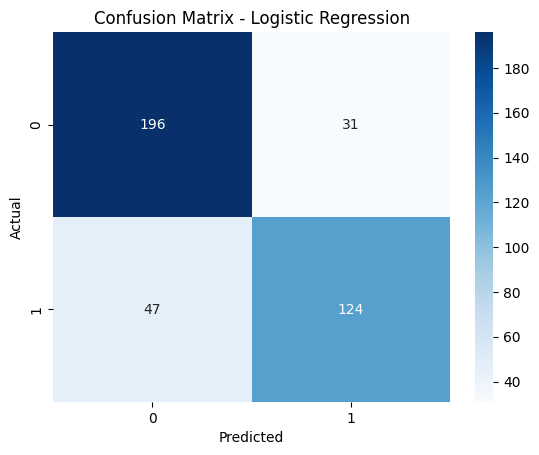


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       227
           1       0.80      0.73      0.76       171

    accuracy                           0.80       398
   macro avg       0.80      0.79      0.80       398
weighted avg       0.80      0.80      0.80       398

Training Random Forest...
Random Forest Accuracy: 0.7688

Confusion Matrix:


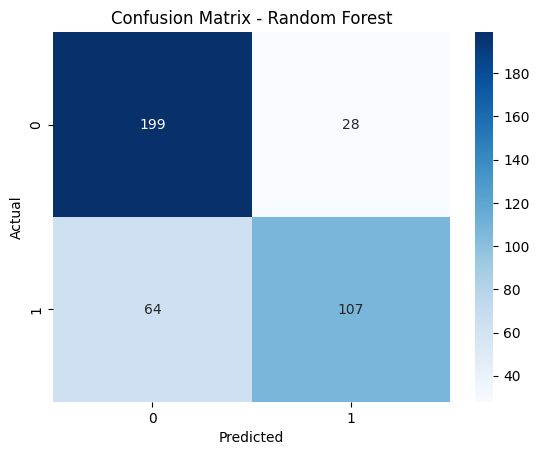


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       227
           1       0.79      0.63      0.70       171

    accuracy                           0.77       398
   macro avg       0.77      0.75      0.76       398
weighted avg       0.77      0.77      0.76       398

Training SVM...
SVM Accuracy: 0.7764

Confusion Matrix:


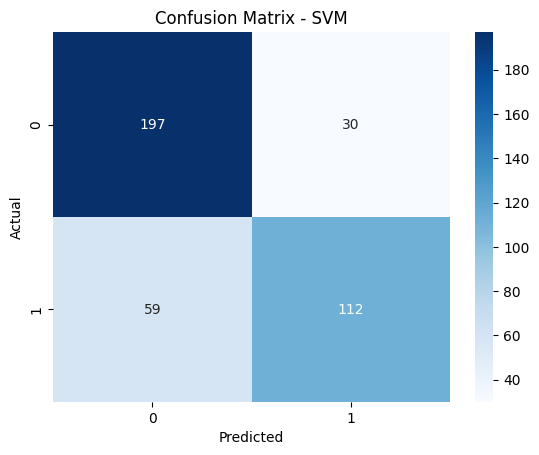


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       227
           1       0.79      0.65      0.72       171

    accuracy                           0.78       398
   macro avg       0.78      0.76      0.77       398
weighted avg       0.78      0.78      0.77       398

Training Naive Bayes...
Naive Bayes Accuracy: 0.7739

Confusion Matrix:


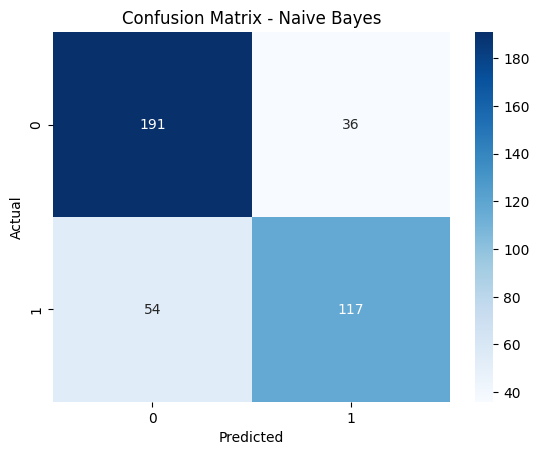


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       227
           1       0.76      0.68      0.72       171

    accuracy                           0.77       398
   macro avg       0.77      0.76      0.77       398
weighted avg       0.77      0.77      0.77       398



In [ ]:
for name, model in models.items():
    print("="*50)
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

/tmp/ipython-input-1463398545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")


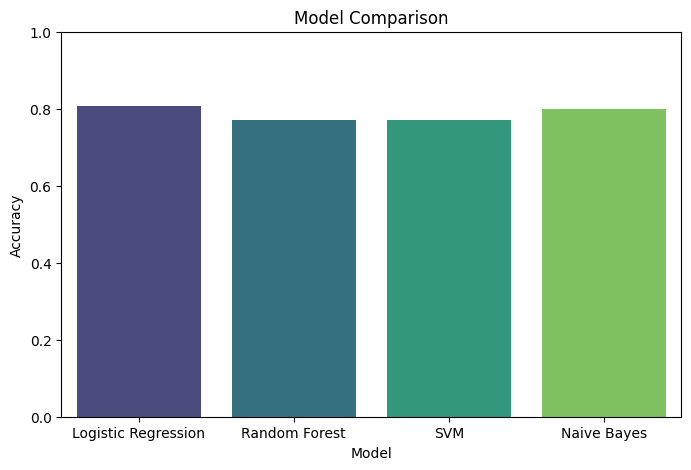

In [ ]:
results_df = pd.DataFrame(list(results.items()), columns=["Model","Accuracy"])
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Comparison")
plt.ylim(0,1)
plt.show()

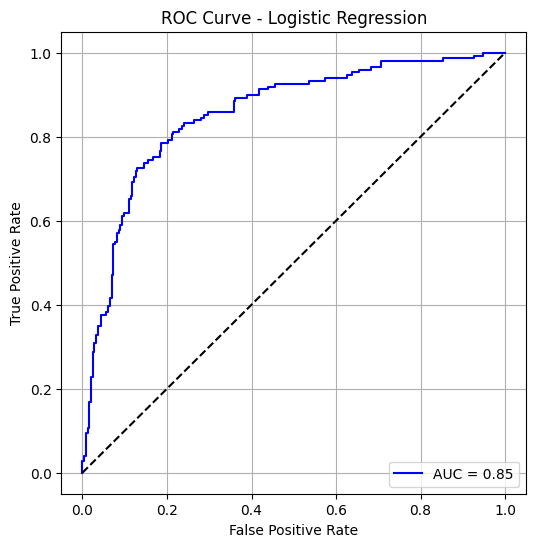

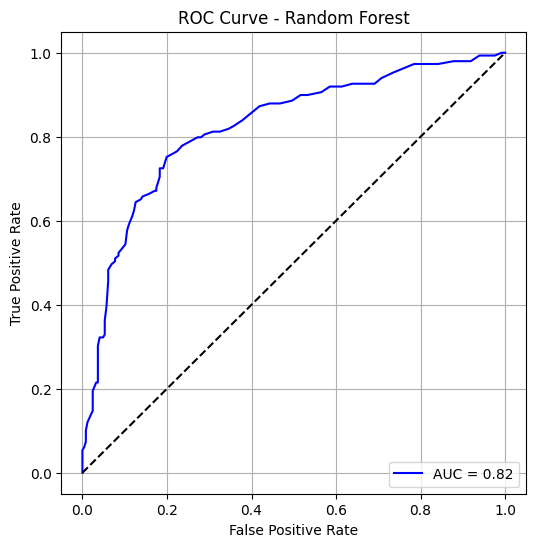

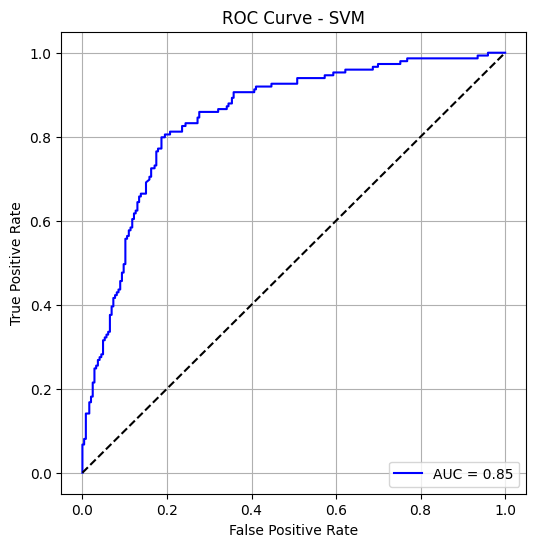

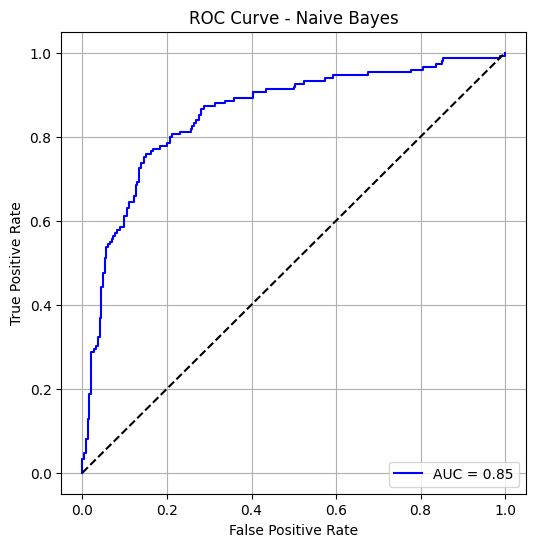

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)


    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [ ]:
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.804020
1        Random Forest  0.768844
2                  SVM  0.776382
3          Naive Bayes  0.773869


In [ ]:
log_params = {
     "C": [0.01, 0.1, 1, 10],
     "solver": ["liblinear", "lbfgs"]
     }

In [ ]:
rf_params = {
     "n_estimators": [50, 100],
     "max_depth": [None, 10],
     "min_samples_split": [2, 5]
 }


In [ ]:
svm_params = {
     "C": [0.1, 1, 10],
     "kernel": ["linear", "rbf"],
     "gamma": ["scale", "auto"]
 }

In [ ]:
grid_searches = {
      "Logistic Regression": GridSearchCV(LogisticRegression(max_iter=1000), log_params, cv=5, scoring="accuracy"),
      "Random Forest": GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring="accuracy"),
      "SVM": GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring="accuracy")
  }

In [ ]:
for name, grid in grid_searches.items():

      print("="*50)
      print(f"Grid Search for {name}...")
      grid.fit(X_train, y_train)
      print("Best Parameters:", grid.best_params_)
      print("Best CV Accuracy:", grid.best_score_)
      best_model = grid.best_estimator_
      y_pred = best_model.predict(X_test)
      print("Test Accuracy:", accuracy_score(y_test, y_pred))

Grid Search for Logistic Regression...
Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best CV Accuracy: 0.7922684348000804
Test Accuracy: 0.7974683544303798
Grid Search for Random Forest...
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.7770604781997188
Test Accuracy: 0.7873417721518987
Grid Search for SVM...
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.7916355234076754
Test Accuracy: 0.810126582278481


In [ ]:
model_names = []
test_accuracies = []
best_scores = []

for name, model in grid_searches.items():
      model.fit(X_train, y_train)
      best_model = model.best_estimator_


      test_acc = accuracy_score(y_test, best_model.predict(X_test))

      model_names.append(name)
      test_accuracies.append(test_acc)
      best_scores.append(model.best_score_)

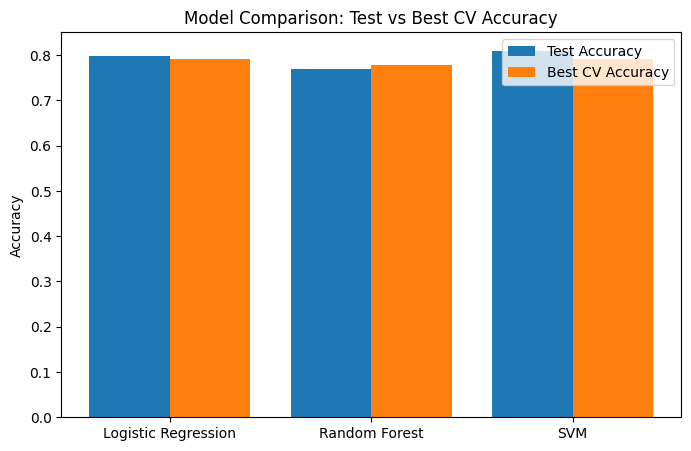

In [ ]:
x = range(len(model_names))
plt.figure(figsize=(8,5))

plt.bar([i-0.2 for i in x], test_accuracies, width=0.4, label="Test Accuracy")
plt.bar([i+0.2 for i in x], best_scores, width=0.4, label="Best CV Accuracy")

plt.xticks(x, model_names)
plt.ylabel("Accuracy")
plt.title("Model Comparison: Test vs Best CV Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring="accuracy")
print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-validation scores: [0.79746835 0.78481013 0.80759494 0.79746835 0.79949239]
Mean Accuracy: 0.7973668315877401
